# Đồ án môn Programming for Data Science

### Sinh viên
    1.18120210            Phạm Tống Bình Minh
    2.18120209            Phạm Nhật Minh

## Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

pd.set_option('max_colwidth', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

In [3]:
plt.style.use('Solarize_Light2')

## Nguồn dữ liệu

Nhóm em sử dụng dữ liệu nói về thông tin khách hàng của một công tin viễn thông cung cấp dịch vụ điện thoại và internet cho 7-43 hộ dân tại Califonia trong quý 3.Thông tin cho biết khách hàng nào đã rời đi, ở lại hoặc đăng ký dịch vụ của công ty.

Dữ liệu này được public trên Kaggle([Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)). Phần đầy đủ của dữ liệu tại [IBM](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

## Đọc dữ liệu

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Khám phá dữ liệu

In [6]:
df.shape

(7043, 21)

Dữ liệu có 7043 dòng và 21 cột

### Dữ liệu có các dòng bị lặp không?

In [128]:
df.duplicated().sum()

0

dữ liệu không bị lặp

### Xem ý nghĩa của các cột

Dưới đây là phần mô tả của các cột trong tập dữ liệu

- **CustomerID**: Định danh duy nhất mỗi khách hàng
- **gender** : Giới tính (male or female)
- **SeniorCitizen**: Khách hàng là người cao tuổi (1: có ,0 Không)
- **Partner**: Khách hàng có đối tác hay không (Yes, No)
- **Dependents**: Khách hàng có người phụ thuộc hay không (Yes, No)
- **tenure**: Số tháng khách hàng duy trì dịch vụ với công ty 
- **PhoneService**: Khách hàng có sử dụng dịch vụ điện thoại hay không
- **MultipleLines**: Khách hàng có sử dụng dịch vụ "MultipleLines" hay không (Yes, No, No phone service)
- **InternetService**: Khách hàng có sử dụng dịch vụ Internet hay không (DSL, Fiber optic, No)
- **OnlineSecurity**: Khách hàng có sử dụng dịch vụ "OnlineSecurity" hay không (Yes, No, No internet service)
- **OnlineBackup**: Khách hàng có sử dụng dịch vụ "OnlineBackup" hay không (Yes, No, No internet service)
- **DeviceProtection**: Khách hàng có sử dụng dịch vụ "DeviceProtection" hay không (Yes, No, No internet service)
- **TechSupport**: Khách hàng có sử dụng dịch vụ "TechSupport" hay không (Yes, No, No internet service)
- **StreamingTV**: Khách hàng có sử dụng dịch vụ "StreamingTV" hay không (Yes, No, No internet service)
- **StreamingMovies**: Khách hàng có sử dụng dịch vụ "StreamingMovies" hay không (Yes, No, No internet service)
- **Contract**: Thời hạn hợp động dịch vụ(Month-to-month, One year, Two year)
- **PaperlessBilling**: Thanh toán không cần giấy tờ ( Yes or No)
- **PaymentMethod**: Phương thức thanh toán (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges**: Chi phí dịch vụ hàng tháng
- **TotalCharges**: Tổng chi phí dịch phụ khách hàng trả
- **Churn**: TV Rating of the movie / show

### Xem tỉ lệ dữ liệu bị thiếu

In [8]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)

In [9]:
missing = df.agg(missing_ratio)
missing[missing > 0]

Series([], dtype: float64)

Có vẻ như không có cột nào bị thiếu

### Xem kiểu dữ liệu của các cột

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

+ Ta thấy cột TotalCharge là dạng object nên ta cần chuyển về kiểu float ở phần Tiền xử lý

## Tiền xử lý

#### chuyển cột "TotalCharges" từ object thành float64

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#### check lại tỉ lệ bị thiếu

In [12]:
missing = df.agg(missing_ratio)
missing[missing > 0]

TotalCharges    0.2
dtype: float64

#### Nhận xét:

    + Vì dữ liệu bị thiếu ở cột TotalChagre không nhiều và dữ liệu còn lại khá lớn nên ta xóa các dòng bị khuyết

In [13]:
df.dropna(inplace= True)

### Với mỗi cột có kiểu dữ liệu có dạng số, các giá trị được phân bố như thế nào?

In [14]:
num_cols = df.select_dtypes(include = 'number').columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [15]:
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)

In [16]:
df[num_cols].agg([min,lower_quartile, median, upper_quartile,max])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
min,0.0,1.0,18.25,18.8
lower_quartile,0.0,9.0,35.60,401.4
median,0.0,29.0,70.40,1397.5
upper_quartile,0.0,55.0,89.90,3794.7
max,1.0,72.0,118.75,8684.8


##### Nhận xét:
    + Các cột giá trị số không có gì khác thường

### Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [17]:
object_cols = df.select_dtypes(exclude = ['number']).columns

In [130]:
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100)[0:5].round(3))
df[object_cols].agg([num_values, value_ratios])
df[object_cols].agg([num_values, value_ratios])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
num_values,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
value_ratios,"{'5924-IFQTT': 0.014, '7781-EWARA': 0.014, '8853-TZDGH': 0.014, '9070-BCKQP': 0.014, '2300-RQGOI': 0.014}","{'Male': 50.469, 'Female': 49.531}","{'No': 51.749, 'Yes': 48.251}","{'No': 70.151, 'Yes': 29.849}","{'Yes': 90.33, 'No': 9.67}","{'No': 48.137, 'Yes': 42.193, 'No phone service': 9.67}","{'Fiber optic': 44.027, 'DSL': 34.357, 'No': 21.615}","{'No': 49.73, 'Yes': 28.655, 'No internet service': 21.615}","{'No': 43.899, 'Yes': 34.485, 'No internet service': 21.615}","{'No': 43.999, 'Yes': 34.386, 'No internet service': 21.615}","{'No': 49.374, 'Yes': 29.01, 'No internet service': 21.615}","{'No': 39.946, 'Yes': 38.439, 'No internet service': 21.615}","{'No': 39.548, 'Yes': 38.837, 'No internet service': 21.615}","{'Month-to-month': 55.105, 'Two year': 23.962, 'One year': 20.933}","{'Yes': 59.272, 'No': 40.728}","{'Electronic check': 33.632, 'Mailed check': 22.81, 'Bank transfer (automatic)': 21.928, 'Credit card (automatic)': 21.63}","{'No': 73.422, 'Yes': 26.578}"


##### Nhận xét:
- Ta thấy ở cột Phone Service có tỉ lệ "No" là 9.67% và cột MultipleLines có tỉ lệ "No phone service" cũng là 9.67%. Điều này hiển nhiên vì nếu không đăng ký dịch vụ "PhoneService" thì không sử dụng được dịch vụ MutipleLines
- Ta thấy các cột "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies" đều có tỉ lệ "No internet service" bắng 21.615% bằng với cột "InternetService" có tỉ lệ "No" là 21.615%. Điều này suy ra được là InternetServer là điều kiện cần để đăng ký các dịch vụ nêu trên.

## Phân tích các Insights

### Insight 1 : Lý do khiến người dùng thay đổi dịch vụ ( churn = "yes")

### Lấy data với churn = "yes"

In [19]:
churn_yes_df = df[df["Churn"] =='Yes']

### Tính thời gian gắn bó (tenure)

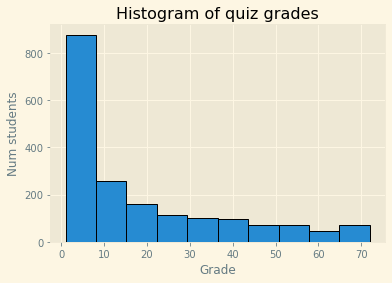

In [20]:
hist = plt.hist(churn_yes_df['tenure'],  
                edgecolor='black')
plt.title('Histogram of quiz grades')
plt.xlabel('Grade')
plt.ylabel('Num students');

### Nhận xét:
    + Biểu đồ thể hiên với thời gian gắn bó ngắn (<10 tháng) thì sẽ tăng tỉ lệ churn
    + Ngược lại khi người dùng đã gắn bó lâu với dịch vụ thì tỉ lệ churn sẽ ít hơn.
 => Có thể nhận định rằng khoảng thời gian 10 tháng đầu là quan trọng nhất để giữ chân khách hàng với dịch vụ

### Phí hàng tháng (Monthly Charge)

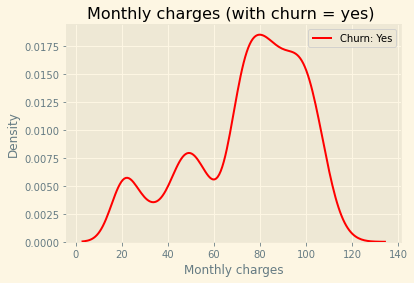

In [21]:
sns.kdeplot(churn_yes_df["MonthlyCharges"],color='red',label='Churn: Yes')
plt.legend()
plt.title("Monthly charges (with churn = yes) ")
plt.xlabel("Monthly charges")
plt.show()

### Nhận xét :
- Từ 70 đến 90 là mức phí hàng tháng quá cao khiến người dùng thay đổi dịch vụ.

### Tổng chi phí (Total Charge)

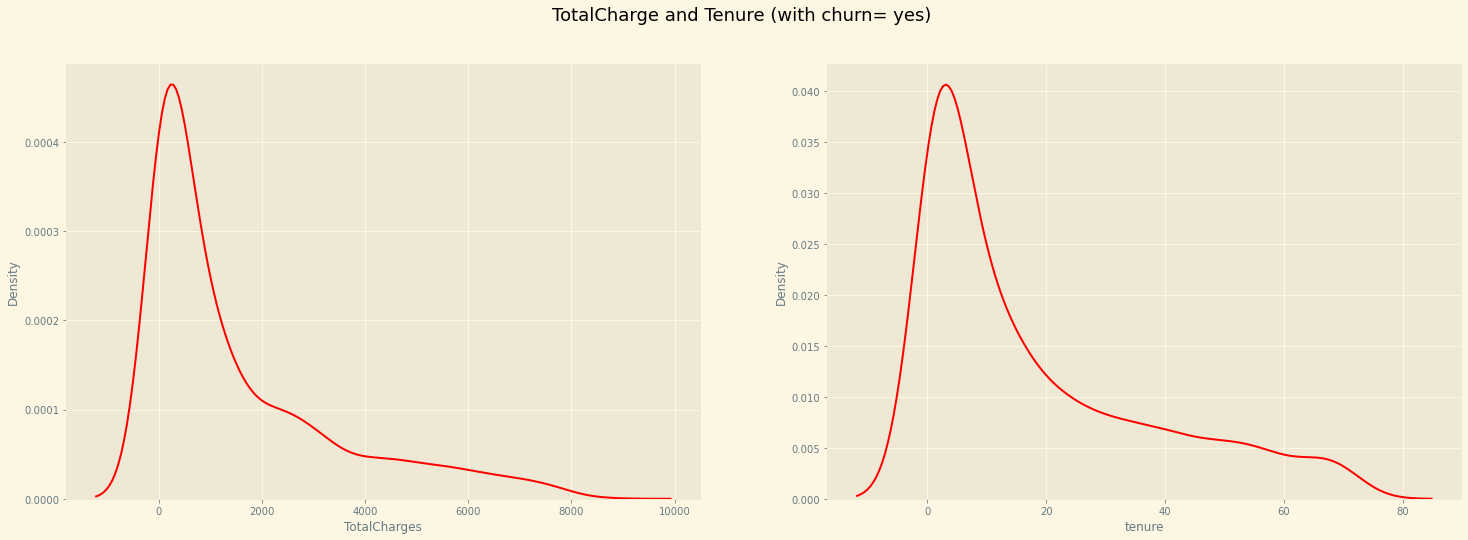

In [22]:
fig, axs = plt.subplots(1,2,figsize=(25,8))

sns.kdeplot(churn_yes_df["TotalCharges"],color='red',label='Churn: Yes' , ax=axs[0])
sns.kdeplot(churn_yes_df["tenure"],color='red',label='Churn: Yes' , ax=axs[1])

fig.suptitle('TotalCharge and Tenure (with churn= yes)', fontsize=18)
plt.show()

### Nhận xét :
- Với tổng chi phí < 2000 đô thì lượng người thay đổi dịch vụ chiếm tỉ trọng cao
- Tuy nhiên ta so sánh với biểu đồ thời lượng sử dụng thì thấy điểm tương đồng

=> Với thời lượng sử dụng dịch vụ ngắn dẫn đến tổng chi phí ngắn

### Dịch vụ liên quan Internet

In [23]:
churn_yes_df["InternetService"].agg([ value_ratios])

value_ratios    {'Fiber optic': 69.395, 'DSL': 24.559, 'No': 6.046}
Name: InternetService, dtype: object

Trong số những người thay đổi dịch vụ (churn = yes) có sử dụng dịch vụ internet chiếm đến 94% (tỉ lệ No chỉ 6%) nên ta xem các dịch vụ liên quan internet có gì bất thường không?

#### Tiền xử lý dữ liệu

In [125]:
def Yes(c):
    return (c.value_counts(normalize=True)['Yes']* 100).round(3)
def No(c):
     return (c.value_counts(normalize=True)['No']* 100).round(3)
    
Internet_churn_yes_df = churn_yes_df[churn_yes_df["InternetService"] != "No"]
cols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
Internet_churn_yes_df = Internet_churn_yes_df[cols].agg([Yes,No])
Internet_churn_yes_df = Internet_churn_yes_df.T
Internet_churn_yes_df

,Yes,No
OnlineSecurity,16.800,83.200
OnlineBackup,29.784,70.216
DeviceProtection,31.036,68.964
TechSupport,17.654,82.346
StreamingTV,46.355,53.645
StreamingMovies,46.583,53.417


#### Biểu đồ thể hiện các dịch vụ liên quan đến internet

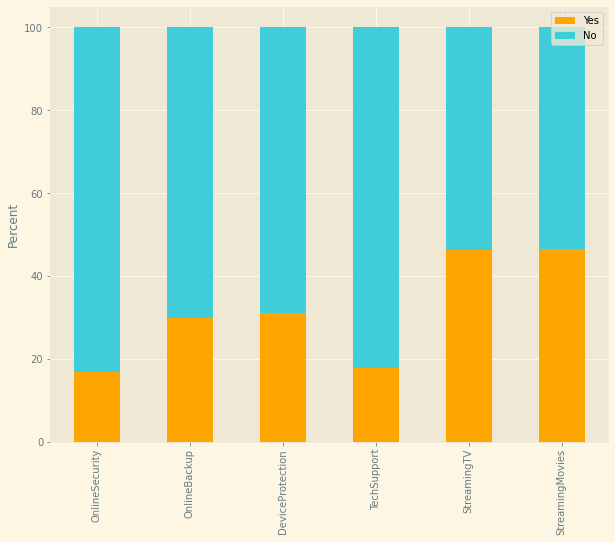

In [126]:
Internet_churn_yes_df.plot.bar(stacked=True, figsize=(10,8), ylabel="Percent",color=['orange', '#3fced9']);

### Nhận xét
- Biểu đồ cho thấy số người sử dụng "OnlineSecurity" và "TechSupport" khá thấp nên người dùng đã bỏ lỡ 2 dịch vụ này dẫn đến không sử dụng dịch vụ Internet bên công ty nữa.
- Biểu đồ cho thấy số người sử dụng "StreamingTV" và "StreamingMovies" cao nhất trong các dịch vụ (>40%) ta nên hỏi ý kiến khách hàng xem có gì không hài lòng dẫn đến việc rời bỏ dịch vụ Internet bên công ty 

### Kết luận :
#### Các lý do khiến người dùng thay đổi dịch vụ:
- Do thời gian gắn bó chưa lâu (<10 tháng) vì vậy cần lắng nghe và chăm sóc khách hàng mới
- Do chi phí hàng tháng quá cao từ ( 70 -> 90) dẫn đến các khách hàng chọn rời dịch vụ
- Do các tính năng trong dịch vụ Internet chưa được tốt dẫn đến các khách hàng chọn rời dịch vụ

### Insight 2: Các góp ý giúp chăm sóc khách hàng tốt hơn

In [136]:
Sernior_Citizen = df[df["SeniorCitizen"] == 1]
Sernior_Citizen
non_Sernior_Citizen = df[df["SeniorCitizen"] == 0]